In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, ReLU
from tensorflow.keras.models import Model

# Load your dataset
dataset_path = '../../data/data.csv'
data = pd.read_csv(dataset_path)

# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Define features and target
target_column = 'Sint'
feature_columns = [col for col in data.columns if col not in ['ID', 'e_Sint', 'Sint']]

X = data[feature_columns]
y = data[target_column]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


2025-08-16 08:28:03.517728: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 08:28:03.528380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755332883.539132   13968 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755332883.542304   13968 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755332883.551681   13968 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# --- Define Residual Block ---
def resnet_block(input_tensor, units):
    x = Dense(units, activation='relu')(input_tensor)
    x = Dense(units)(x)
    x = Add()([x, input_tensor])
    x = ReLU()(x)
    return x

# --- Build Model ---
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = resnet_block(x, 64)
x = resnet_block(x, 64)
x = Dense(1)(x)

model = Model(inputs, x)
model.compile(optimizer='adam', loss='mse')

I0000 00:00:1755332889.515851   13968 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5757 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
# --- Train ---
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=32, verbose=1)

# --- Predict ---
y_pred = model.predict(X_test)

Epoch 1/100


I0000 00:00:1755332900.466549   14078 service.cc:152] XLA service 0x707f1000ba40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755332900.466658   14078 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2025-08-16 08:28:20.508777: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755332900.663941   14078 cuda_dnn.cc:529] Loaded cuDNN version 90300


 92/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.2411

I0000 00:00:1755332902.214424   14078 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.3994

2025-08-16 08:28:23.000815: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_260', 4 bytes spill stores, 4 bytes spill loads



130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 50.7824

2025-08-16 08:28:24.137552: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28', 8 bytes spill stores, 8 bytes spill loads



130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 73.5649 - val_loss: 19.9427
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1394 - val_loss: 10.6422
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1532 - val_loss: 6.1486
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9277 - val_loss: 5.9964
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5766 - val_loss: 5.4616
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5255 - val_loss: 4.4425
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9418 - val_loss: 3.5452
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4094 - val_loss: 5.4411
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5211 - val_loss: 3.1460
Epoch 10/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2263 - val_loss: 3.3587
Epoch 11/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6674 - val_loss: 10.8425
Epoch 12/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 

R²: 0.9355
MAE: 0.3750
MSE: 6.9760
RMSE: 2.6412
MAE Accuracy: 99.92%
MSE Accuracy: 98.51%
RMSE Accuracy: 99.44%


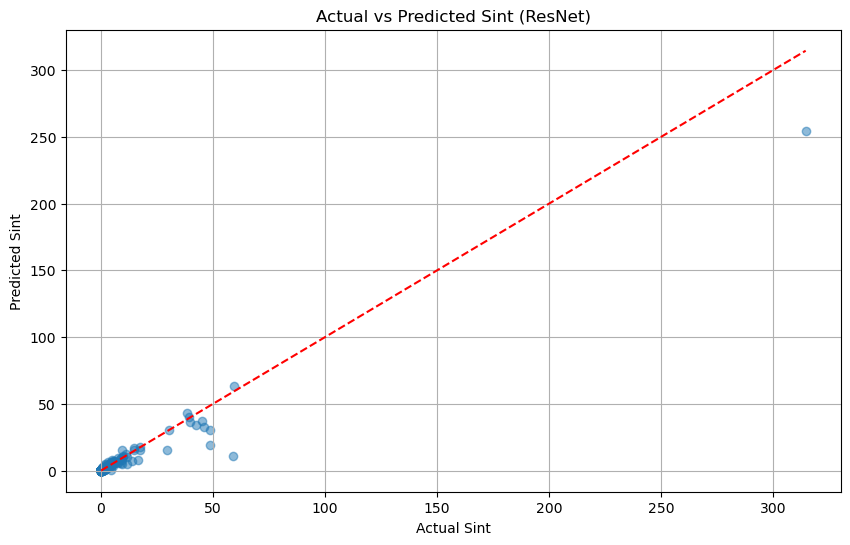

In [4]:
# --- Metrics ---
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Accuracy (custom logic)
range_y = y.max() - y.min()
mae_accuracy = (1 - mae / range_y) * 100
mse_accuracy = (1 - mse / range_y) * 100
rmse_accuracy = (1 - rmse / range_y) * 100

# --- Print Metrics ---
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE Accuracy: {mae_accuracy:.2f}%")
print(f"MSE Accuracy: {mse_accuracy:.2f}%")
print(f"RMSE Accuracy: {rmse_accuracy:.2f}%")

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sint')
plt.ylabel('Predicted Sint')
plt.title('Actual vs Predicted Sint (ResNet)')
plt.grid(True)
plt.show()